# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.



     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

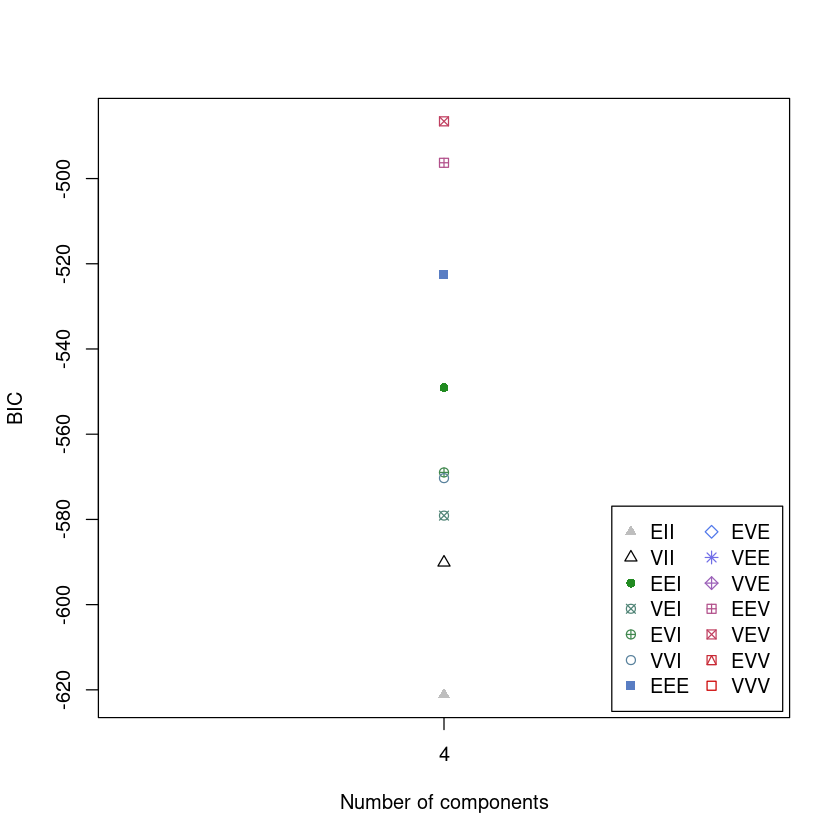

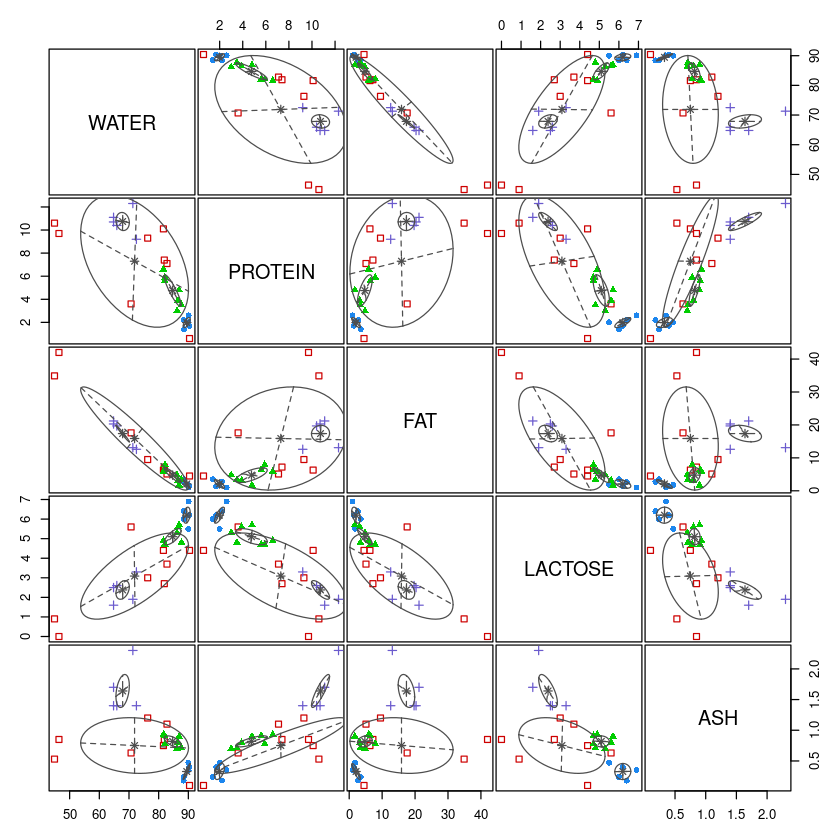

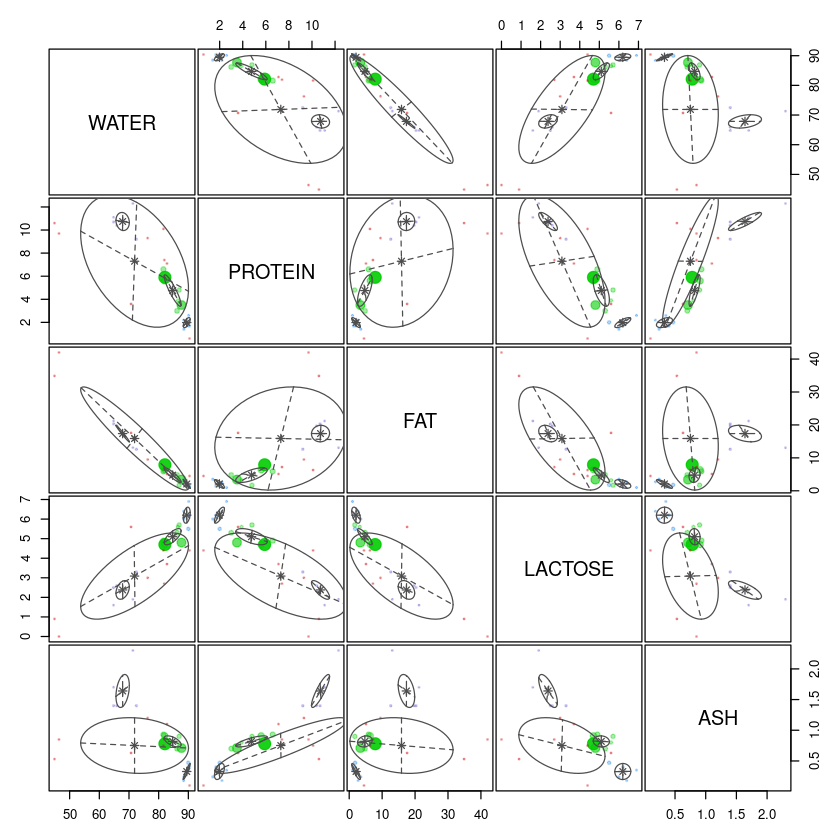

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

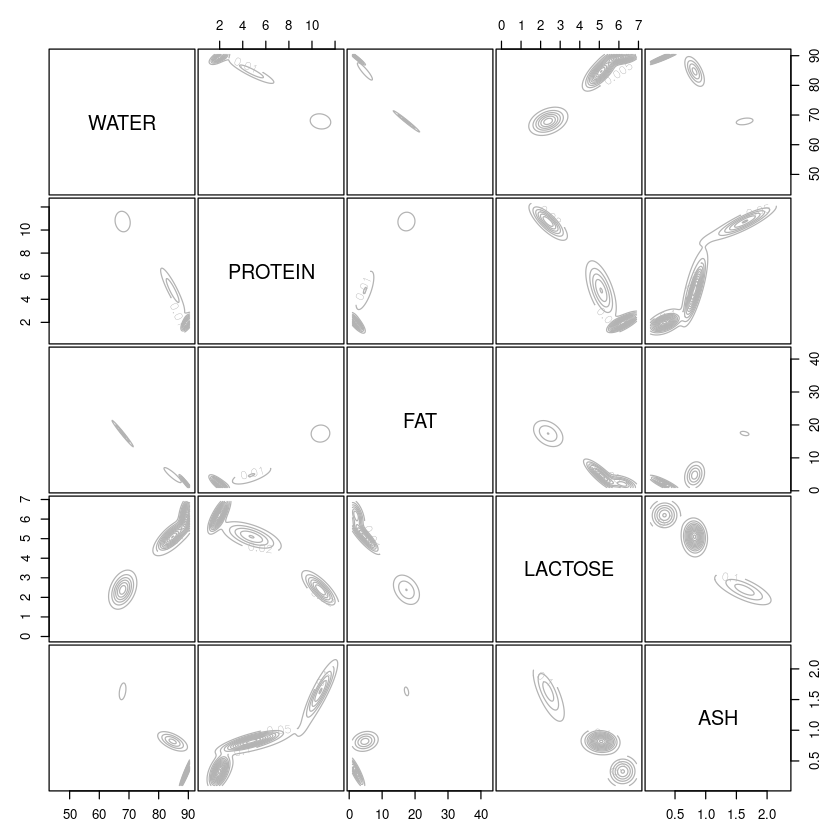

In [2]:
clus <-Mclust(datos,4)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



# Ejercicio 1: 

### a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.

El método Mclust funciona considera que las observaciones proceden de diferentes distribuciones, utilizando el algoritmo de Expectation Maximization para identificar volumen, forma y orientacion de cada uno de los modelos del cluster.

Se procede a realizar la aplicación del algoritmo MCLUST. Lo primero que hacemos es identificar el k propuesto por mclust, para esto utilizamos la libreria mclust y proponemos utilizar hasta un maximo de 10 clusters

El paquete mclust emplea maximum likelihood para ajustar todos estos modelos con distinto número k de clusters y selecciona el mejor en base al Bayesian Information Criterion (BIC). 

### Parámetros de entrada:

Se ingresan los datos, seguido del número de cluster.

* Los datos deben ser un vector númerico, matriz o datos de observación. No se permiten variables categoricas.


* El número de cluster o agrupaciones, es la cantidad de grupos que se va a utilizar para el modelo, para que el BIC sea calculado. Esta cantidad de grupos (clusters) en su defecto son valores entre 1:9.

### Parámetros de salida:
* clus classification: Este parametro corresponde a la clasificación z. Un ejemplo: map(z)


* z: Es una matriz z[i,k], cuyas entradas corresponden a las probabilidad de que la observación __i__ en los datos de prueba, pertenece a la clase **k**


* clus parameters mean: Corresponde a la media de cada párametro. Si existe más de un párametro, esta es una matriz cuya columna __k__ es la media del párametro **k** de el modelo de mezcla.

### b) Interprete y comente los resultados obtenidos.

Se uso el modelo "VEV" (ellipsoidal, equal shape)con 4 grupos, que entrega lo siguiente:

* __log-likelihood (logaritmo máximo verosimilitud):__ -129.0138 .
* __n(número de individuos):__  25
* __df(número de los párametros):__  71
* __BIC (Criterio de Información Bayesiano):__ -486.5678
* __ICL (Integrated Complete-data Likelihood):__ -486.5782
 
Tabla de clustering:
* Grupo 1 : 5 individuos
* Grupo 2 : 8 individuos
* Grupo 3 : 7 individuos
* Grupo 4 : 5 individuos

Se prioza usar el modelo VEV, porqué de todos los modelos vistos en el gŕafico es el que tiene el mayor BIC, en comparación a los otros modelos.

Se gráfica cada grupo por par de componentes, cada centro y las medias de cada párametro de grupos.

|WATER   | PROTEIN  | FAT     |LACTOSE |ASH      |
|--------| ---------|---------|--------| --------|
|89.45999| 1.980001 | 2.080005|6.200009|0.3279979|
|71.88271| 7.298580 |15.881214|3.088610|0.7512686|
|84.71493| 4.756873 |4.756149 |5.100211|0.8185953|
|67.86000| 10.740002|17.380003|2.379999|1.6400005|


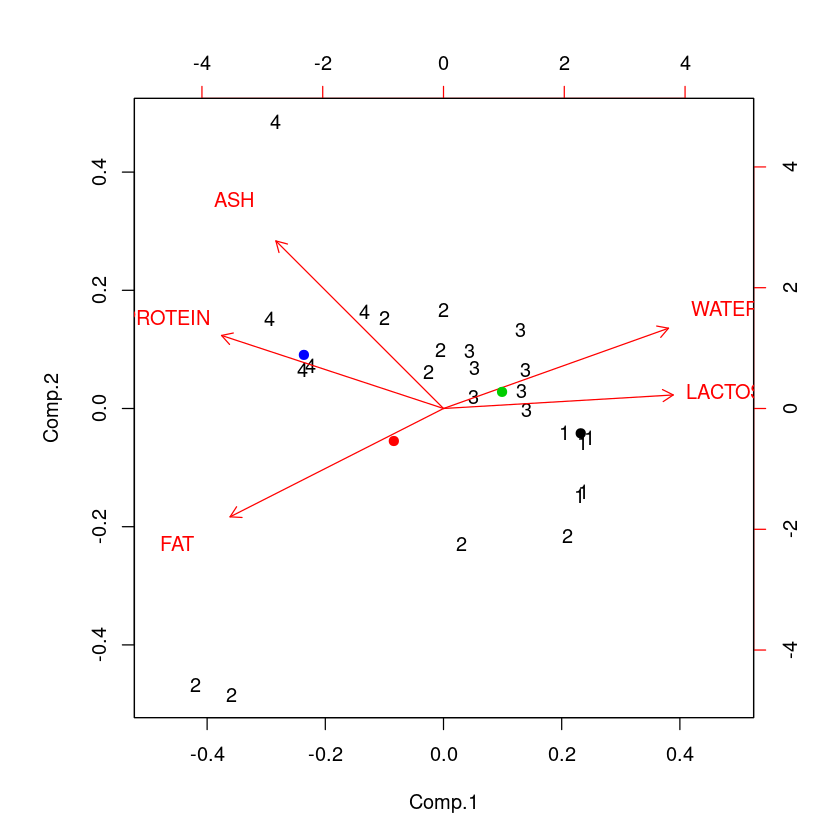

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

# Ejercicio 2: 

### a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

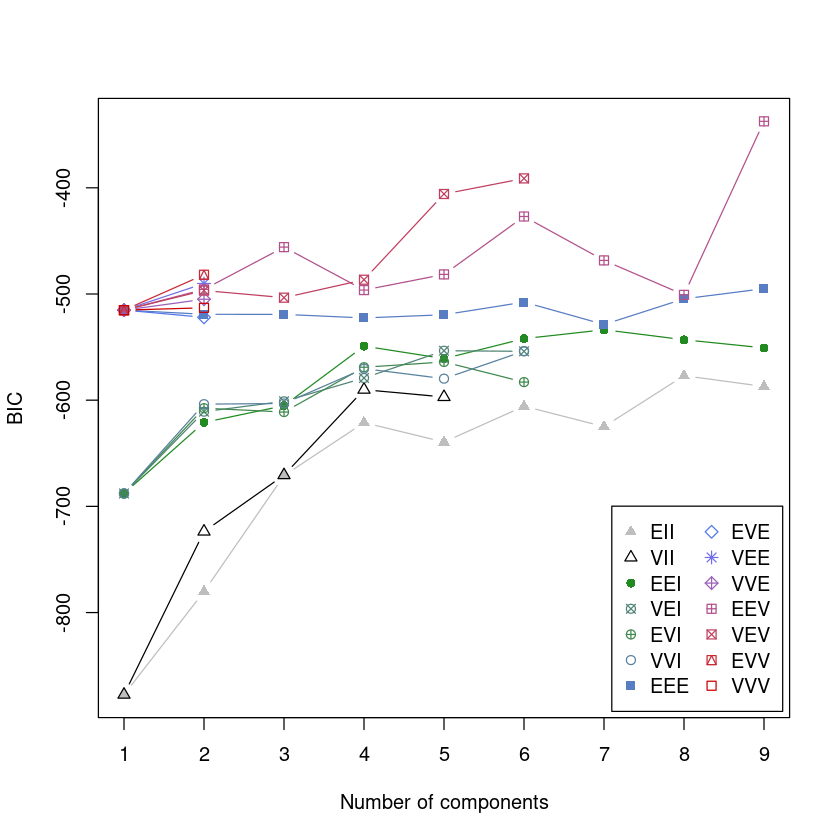

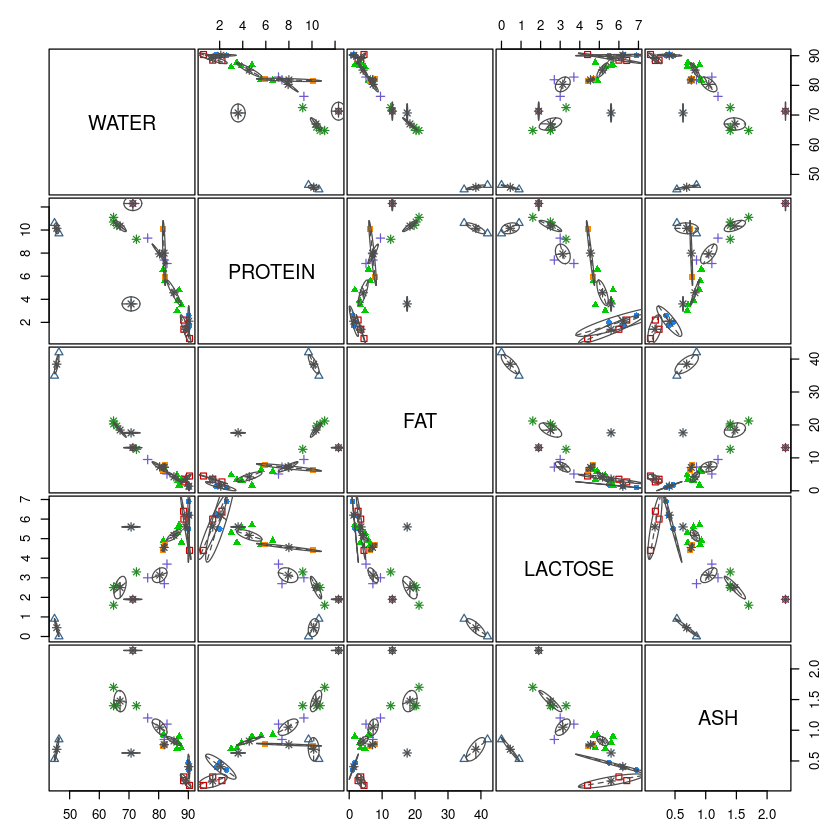

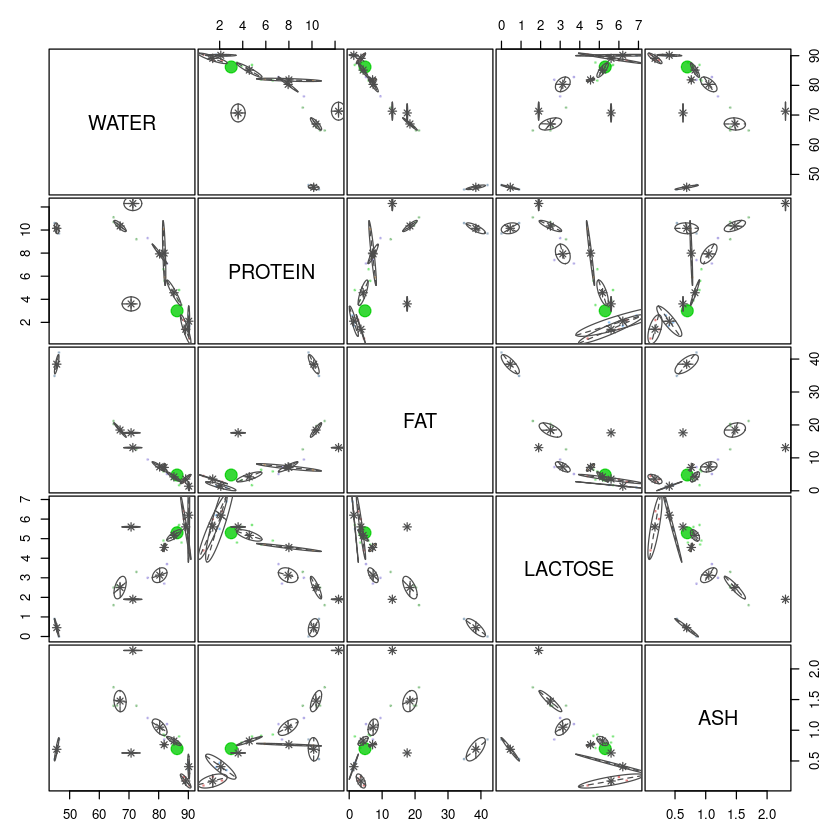

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
90.13333,2.100000,1.400000,6.200000,0.4066667
89.10000,1.400000,3.566667,5.600000,0.1733333
85.15000,4.566667,4.233333,5.166667,0.8250000
80.33333,7.933333,7.266667,3.133333,1.0500000
81.85000,8.000000,7.100000,4.550000,0.7650000
70.70000,3.600000,17.600000,5.600000,0.6300000
71.30000,12.300000,13.100000,1.900000,2.3000000
67.00000,10.350000,18.450000,2.500000,1.4750000
45.65000,10.150000,38.450000,0.450000,0.6900000


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          2          2          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         5          4          5          3          3          1          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          4          6          7          8          8 
  REINDEER      WHALE       SEAL    DOLPHIN 
         8          8          9          9

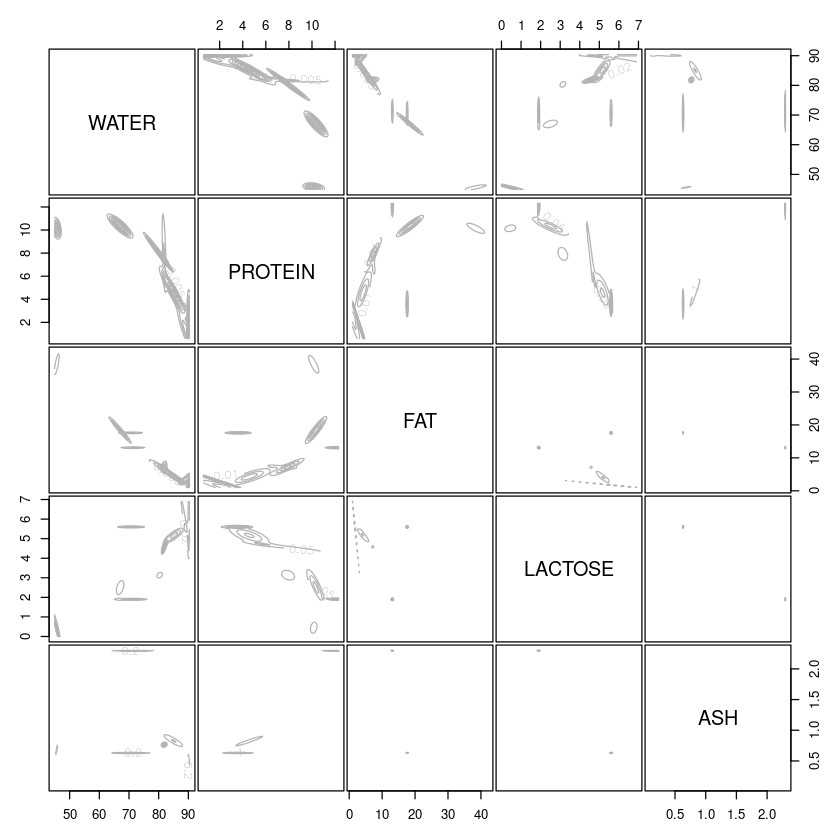

In [4]:
# Mclust sin definir número de grupos 
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl


En este caso se usa el modelo Mclust EEV (ellipsoidal, equal volume and shape) con 9 grupos

* __log-likelihood (logaritmo máximo verosimilitud):__  69.49069 . 
* __n(número de individuos):__  25
* __df(número de los párametros):__  148
* __BIC (Criterio de Información Bayesiano):__ -337.4122
* __ICL (Integrated Complete-data Likelihood):__ -337.4122

Tabla de clustering:
* Grupo 1 : 3 individuos
* Grupo 2 : 3 individuos
* Grupo 3 : 6 individuos
* Grupo 4 : 3 individuos
* Grupo 5 : 2 individuos
* Grupo 6 : 1 individuos
* Grupo 7 : 1 individuos
* Grupo 8 : 4 individuos
* Grupo 9 : 2 individuos

**Ahora usaremos 3 grupos, esto tomando en cuenta el máximo que se observa en el gráfico.**

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood  n df       BIC       ICL
      -144.2366 25 52 -455.8548 -455.8584

Clustering table:
 1  2  3 
14  5  6 

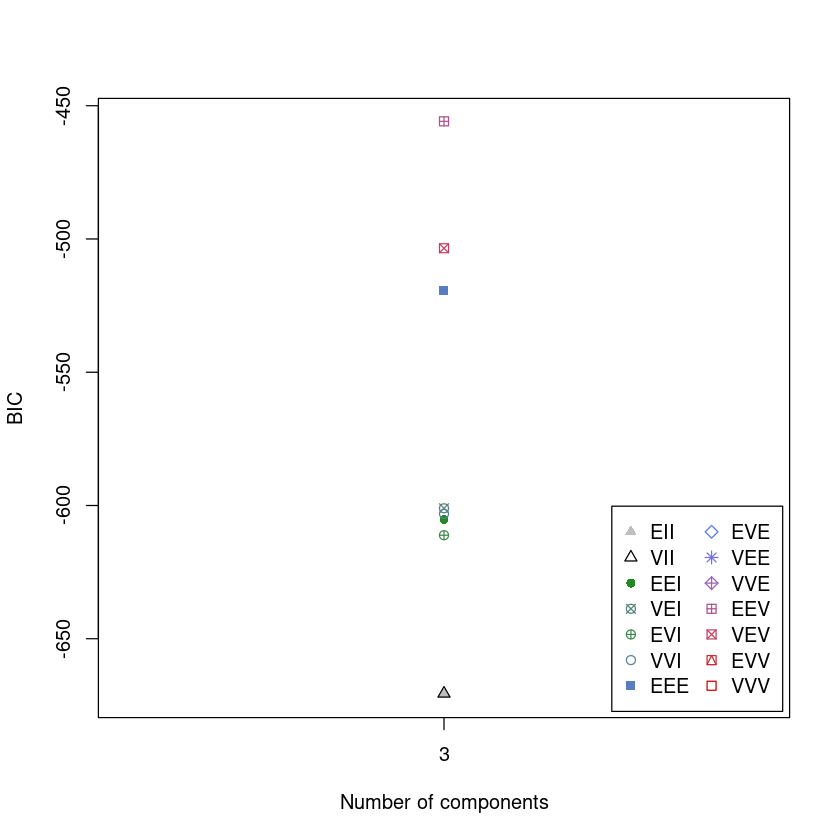

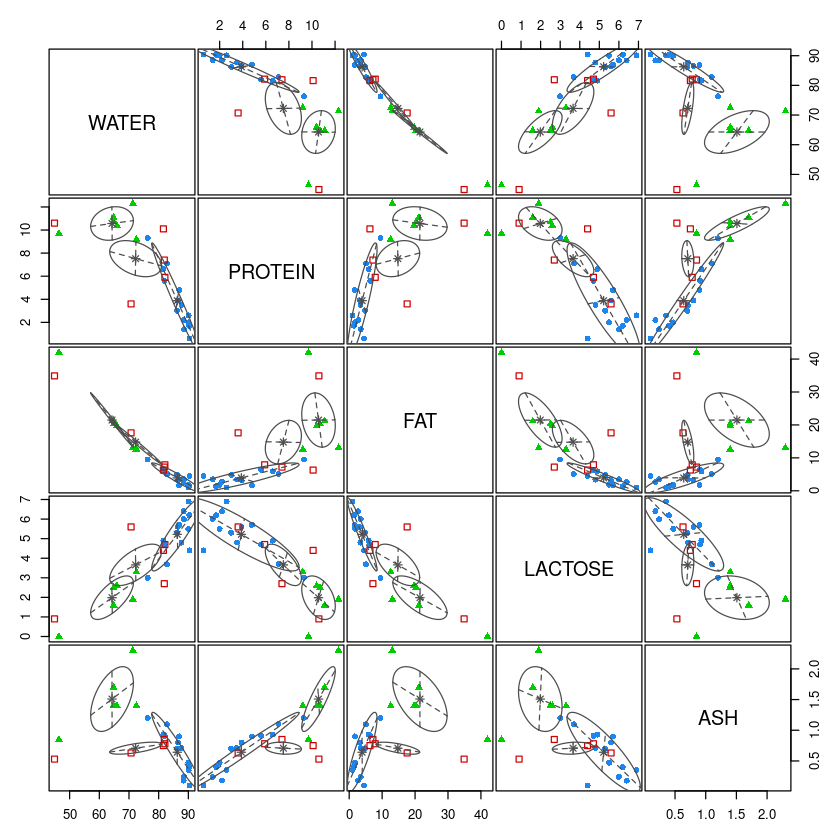

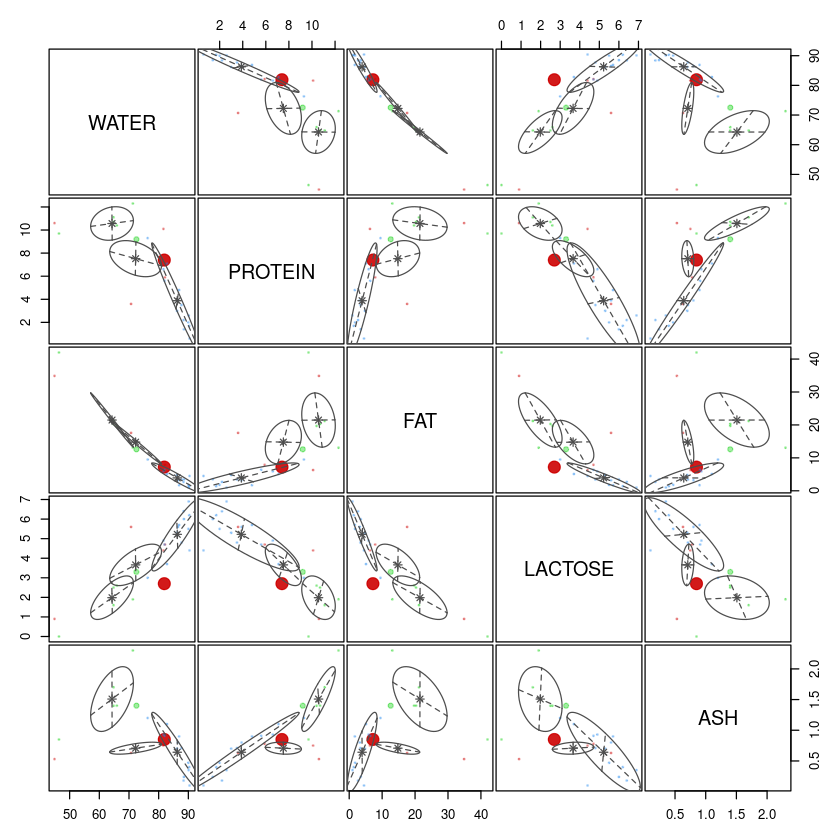

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

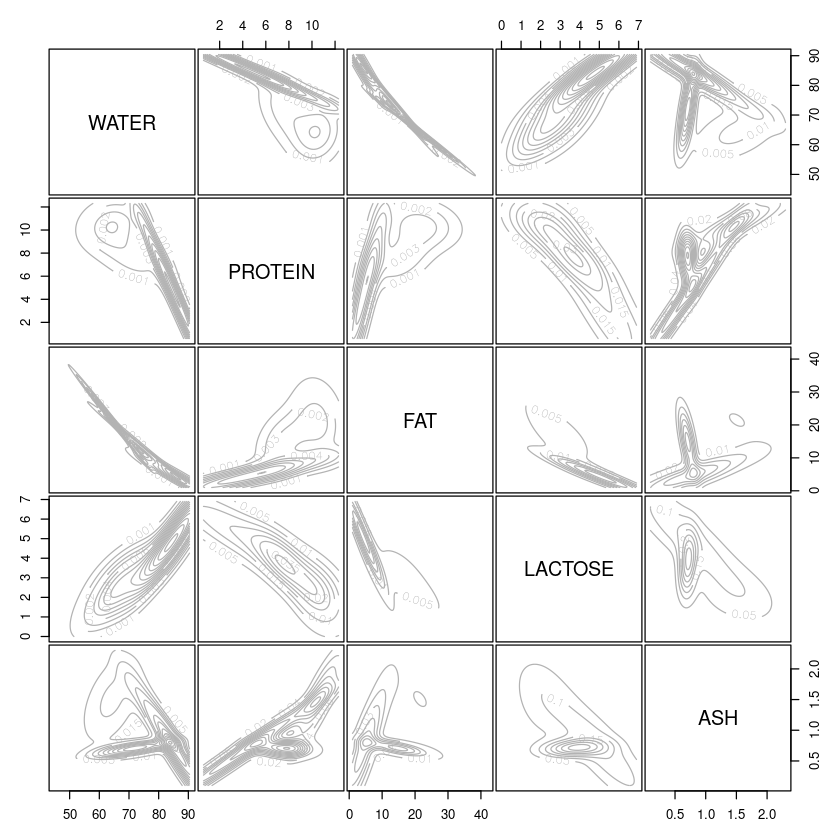

In [5]:
# Mclust con 3 grupos 
clus <-Mclust(datos,3)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

En este caso se usa el modelo Mclust EEV (ellipsoidal, equal volume and shape) con 3 grupos

* __log-likelihood (logaritmo máximo verosimilitud):__   -144.2366 . 
* __n(número de individuos):__  25
* __df(número de los párametros):__  52
* __BIC (Criterio de Información Bayesiano):__ -455.8548
* __ICL (Integrated Complete-data Likelihood):__ -455.8584

Tabla de clustering:
* Grupo 1 : 14 individuos
* Grupo 2 : 5 individuos
* Grupo 3 : 6 individuos


## b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

En primer lugar, el modelo k-means agrupa a partir de la distancia eucladiana $d_e = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $, mientras que el modelo GMM realiza el cálculo de la probabilidad incorporando a la vez la distancia al valor medio de la distribución a través de la distribución normal.

K-means asigna valores deterministas durante el paso E, por su parte, GMM realiza asignaciones probabilisticas durante el paso E.

K-means asume un grupo esférico y con igualdad de probalidad para cada grupo, por eso al visualizarlo se puede notar que los datos están muy cerca uno de los otros. A su vez GMM, puede usarse con grupos no esféricos (elipses,etc), así se pueden generar grupos con diferentes probabilidades, gráficamente puede notarse al ver datos muy distanciados con otros, aunque sea del mismo grupo.


En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

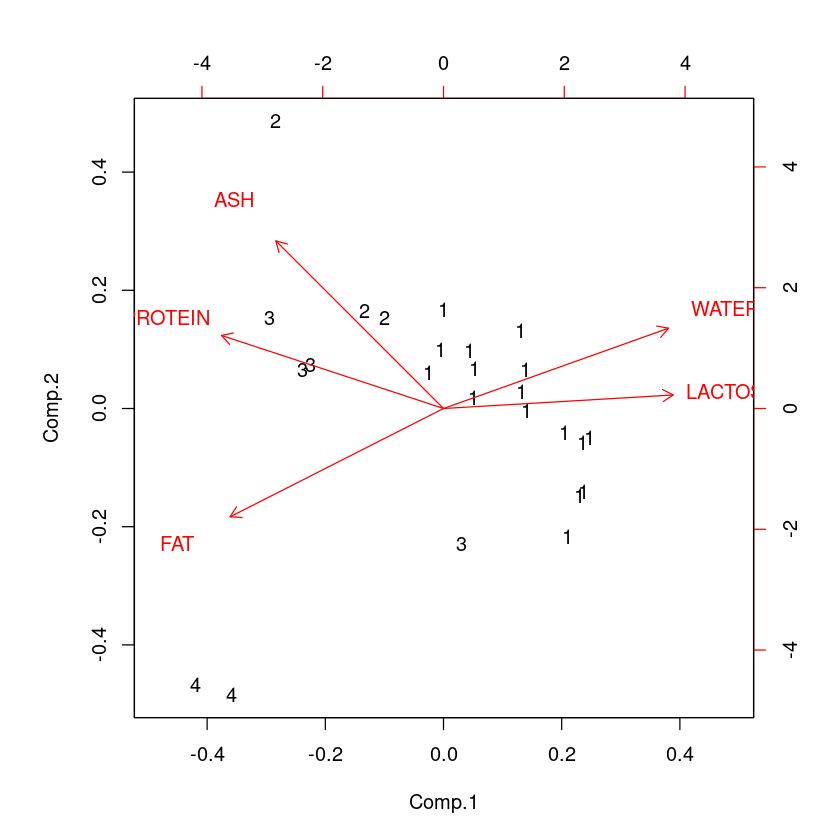

In [6]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

# Ejercicio 3: 

## a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

El método hclust realiza un análisis jerárquico de conglomerados en un conjunto de diferencias y métodos para analizarlo.

Esta función realiza un análisis de agrupamiento jerárquico utilizando un conjunto de diferencias para los n objetos que se agrupan. Inicialmente, cada objeto se asigna a su propio grupo y luego el algoritmo procede de forma iterativa, en cada etapa uniendo los dos grupos más similares, continuando hasta que haya un solo grupo. En cada etapa, las distancias entre grupos se vuelven a calcular mediante la fórmula de actualización de disparidad de Lance-Williams 

$$d(i \cup j ,k)= \alpha_i d(i,k)+ \alpha_j d(j,k)+ \beta d(i,j) + \gamma |d(i,k)-d(j,k)|$$

de acuerdo con el método de agrupación particular que se utiliza.

Se proporcionan varios métodos de agrupación diferentes. El método de varianza mínima de Ward tiene como objetivo encontrar grupos compactos y esféricos. El método de enlace completo encuentra grupos similares. El método de enlace único (que está estrechamente relacionado con el árbol de expansión mínimo) adopta una estrategia de agrupación de 'amigos de amigos'. 
### * Parámetros de entrada:

* __datos:__ Corresponde a los datos a trabajar .
* __d:__ una estructura de disimilitud en base a la distancia.
* __dist:__ la distancia que se ha utilizado para crear d
* __método:__  El método de aglomeración a utilizar. Esto debería ser "ward.D", "ward.D2", "single", "complete", "average", "mcquitty", "median" o "centroid".
* __members:__ NULL o un vector con un tamaño de longitud de d.


### * Parámetros de salida:

* __merge:__ Matriz de n-1 por 2. La fila i de merge describe la fusión de clústeres en el paso i de la agrupación. Si un elemento j  en la fila es negativo, entonces la observación - j  se fusionó en esta etapa. Si j  es positivo, entonces la fusión se realizó con el clúster formado en la etapa (anterior) j del algoritmo. Así las entradas negativas en $merge$ indican las aglomeraciones de los que estan solos, y los enteros positivos indican la aglomeración de los que no están solos.


* __height:__ Un conjunto de n-1 valores reales. La altura de $clustering$: es decir, el valor del criterio asociado con el método de agrupamiento para la aglomeración particular.


* __order:__ Un vector que proporciona la permutación de las observaciones originales adecuadas para el gráfico, en el sentido de que un diagrama de clúster que utiliza este orden y la matriz $merge$ no tendrá cruces de las ramas.


* __labels:__ Etiquetas para cada objeto clusterizado.


* __call:__ La llamada que produce el resultado.


* __method:__ El método de clúster que se ha utilizado.


* __dist.method:__ La distancia que se ha utilizado para crear d.



## b) Interprete y comente los resultados obtenidos. 

## c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

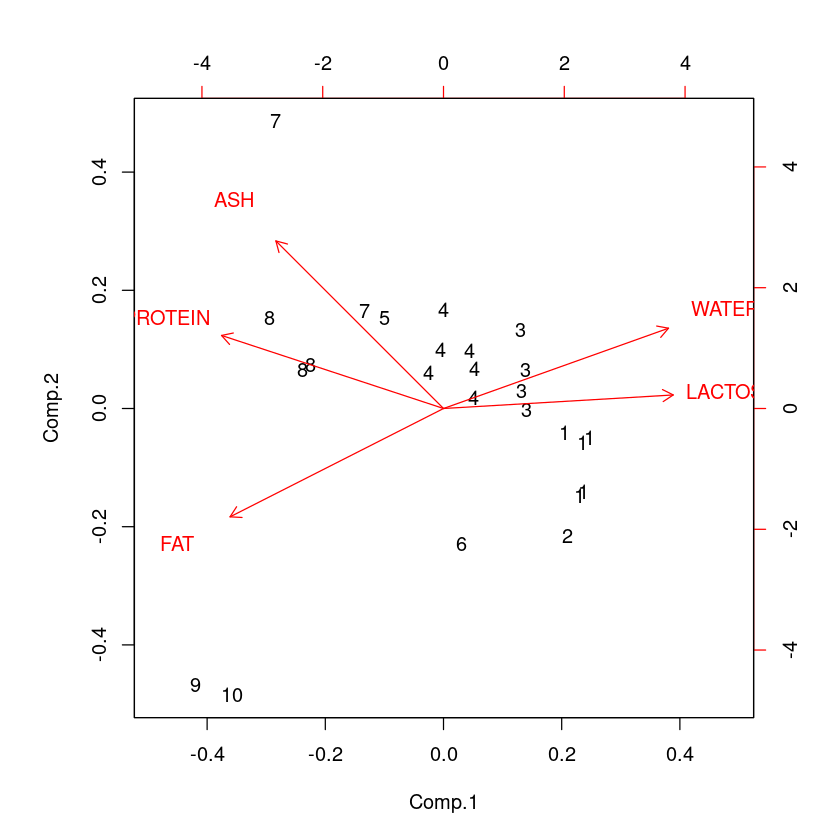

In [7]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,10))

# Ejercicio 4: 

### a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv. Interprete sus resultados.





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




    sepal.length sepal.width petal.length petal.width    variety
1            5.1         3.5          1.4         0.2     Setosa
2            4.9         3.0          1.4         0.2     Setosa
3            4.7         3.2          1.3         0.2     Setosa
4            4.6         3.1          1.5         0.2     Setosa
5            5.0         3.6          1.4         0.2     Setosa
6            5.4         3.9          1.7         0.4     Setosa
7            4.6         3.4          1.4         0.3     Setosa
8            5.0         3.4          1.5         0.2     Setosa
9            4.4         2.9          1.4         0.2     Setosa
10           4.9         3.1          1.5         0.1     Setosa
11           5.4         3.7          1.5         0.2     Setosa
12           4.8         3.4          1.6         0.2     Setosa
13           4.8         3.0          1.4         0.1     Setosa
14           4.3         3.0          1.1         0.1     Setosa
15           5.8         

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

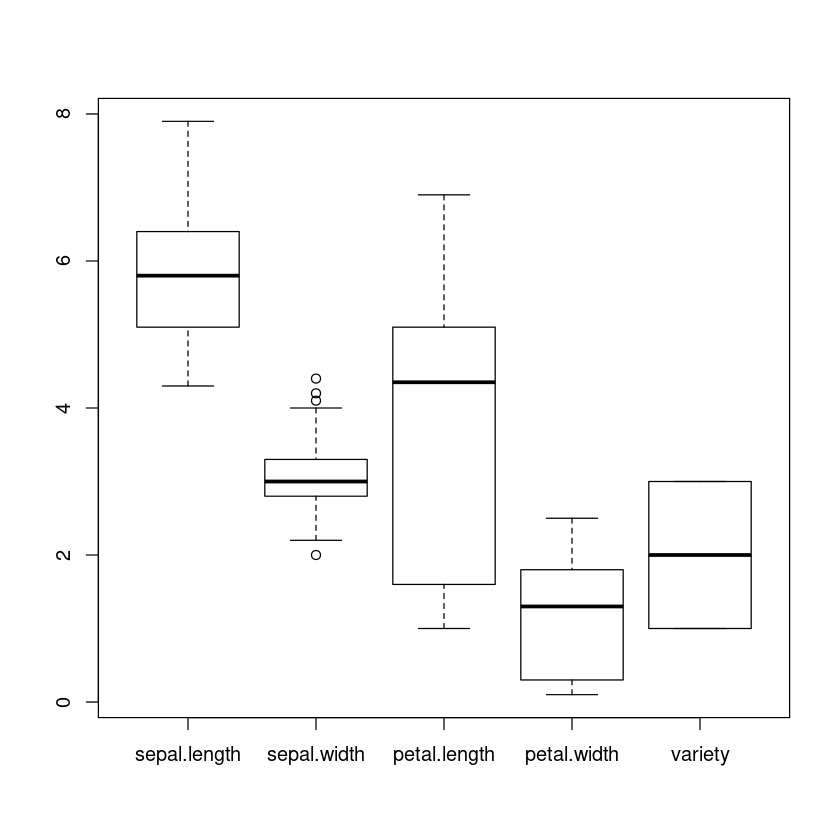

In [8]:
#K-MEANS
library(cluster)
library(ggplot2)
library(readr)
library(dplyr)
#ruta datos

datos2<-read.csv("iris.csv",sep=";",header=TRUE,dec=",")
print(datos2)
summary(datos2)
boxplot(datos2)

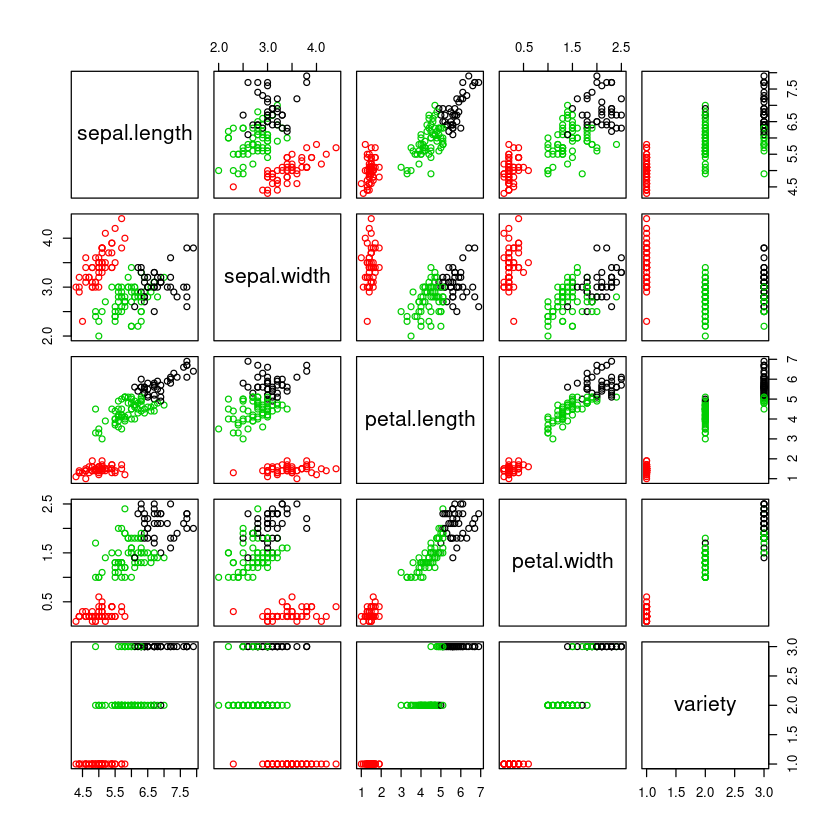

In [9]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos2[,-5],k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos2,col=cl$cluster)

De estos resultados podemos comentar lo siguiente: 

* Entre la comparación de el largo de los sépalos y el ancho de estos, los puntos rojos varian mucho entre el ancho de los sepálos sin una tendencia. Por su parte los puntos negros sons las plantas que tienen anchura y largo sépalos medianos y la mayoría tiende entre 10 y 20. Finalmente los puntos verdes son las plantas con sépalos más largos pero con anchuras entre 10 y 20.

* La comparativa entre el largo y ancho de los pétalos, podemos decir que los puntos verdes son las plantas que tienen pétalo más anchos y largos, las de color negro son las que tienen un tamaño medio entre largo y ancho, y finalmente los puntos rojos son los que tienen pétalos muy cortos y pequeños.

* El cuadro que refleja el ancho de pétalos y ancho de sépalos, los puntos rojos refleja que el ancho de los pétalos toma variados valores, por su contraparte, los puntos verdes se puede observar una mayor concentración de plantas con ancho de sépalos y largo medio de pétalos. Y los puntos negros podemos decir que son las plantas que presentan ancho de pétalos y ancho de sépalos medio, además de estar en una mejor concentración que los puntos rojos que eran muy dispersos.


In [10]:
#GMM
library(mclust)
library(cluster)
library(readr)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos2 <-read.csv("iris.csv",sep=";",header=TRUE,dec=",")
summary(datos2)

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 2 components: 

 log-likelihood   n df       BIC       ICL
      -116.0861 150 37 -417.5657 -417.5662

Clustering table:
  1   2 
 50 100 

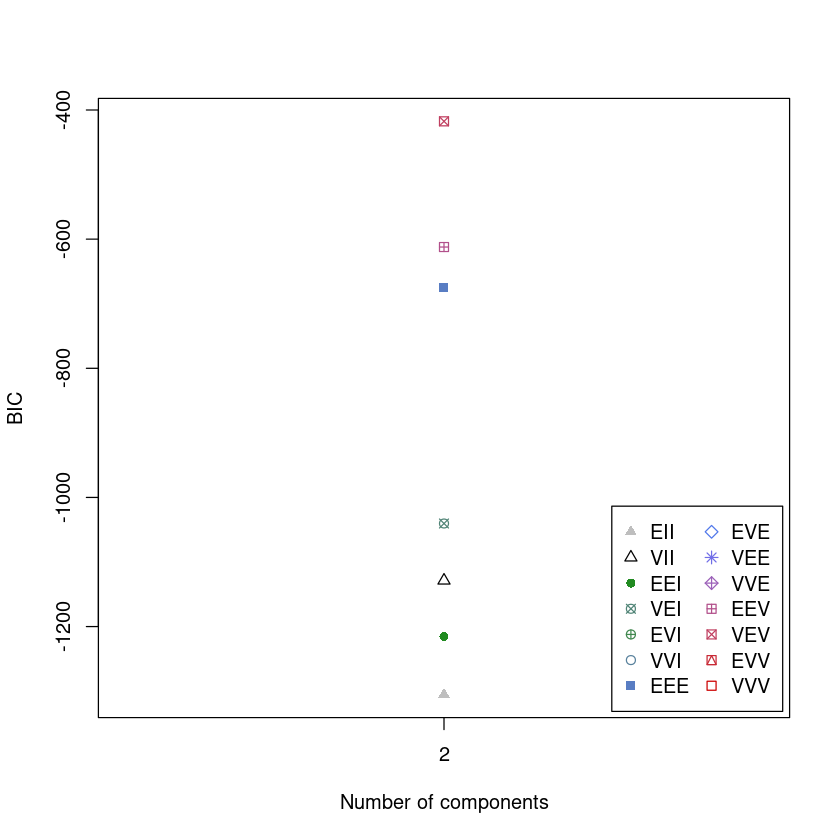

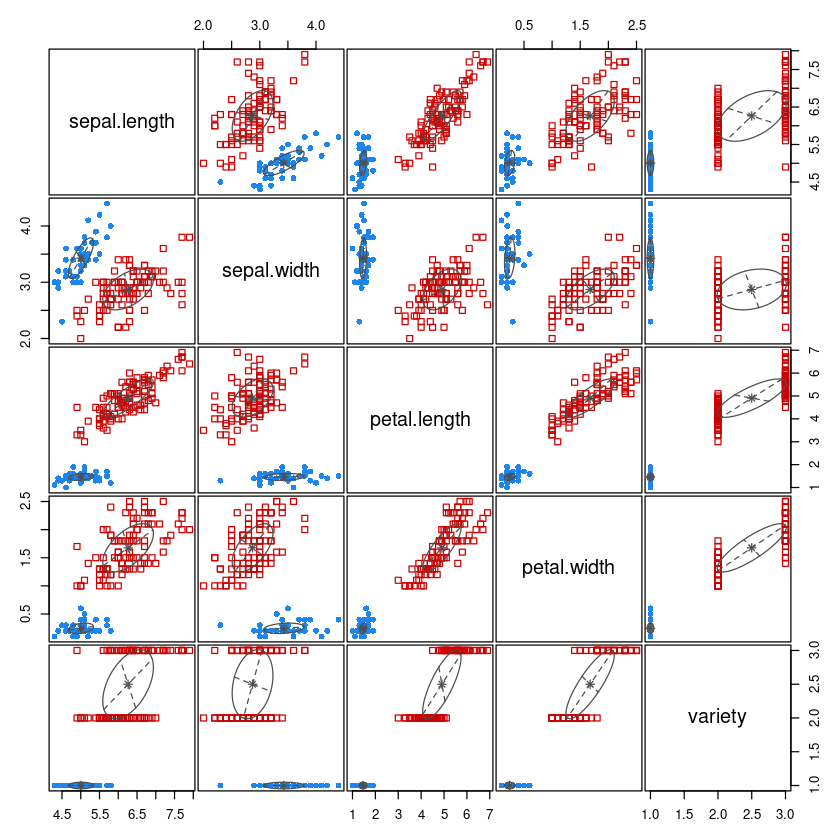

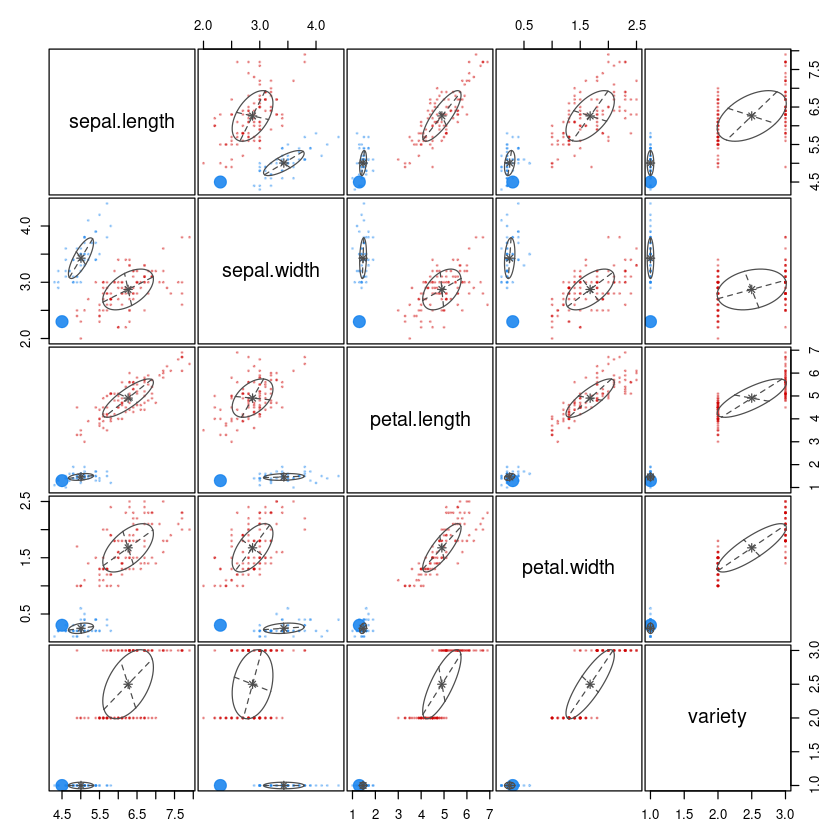

'Mclust' model object: (VEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

sepal.length,sepal.width,petal.length,petal.width,variety
5.006003,3.428006,1.462001,0.2459997,1.000000
6.261995,2.871998,4.905990,1.6759962,2.499996


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

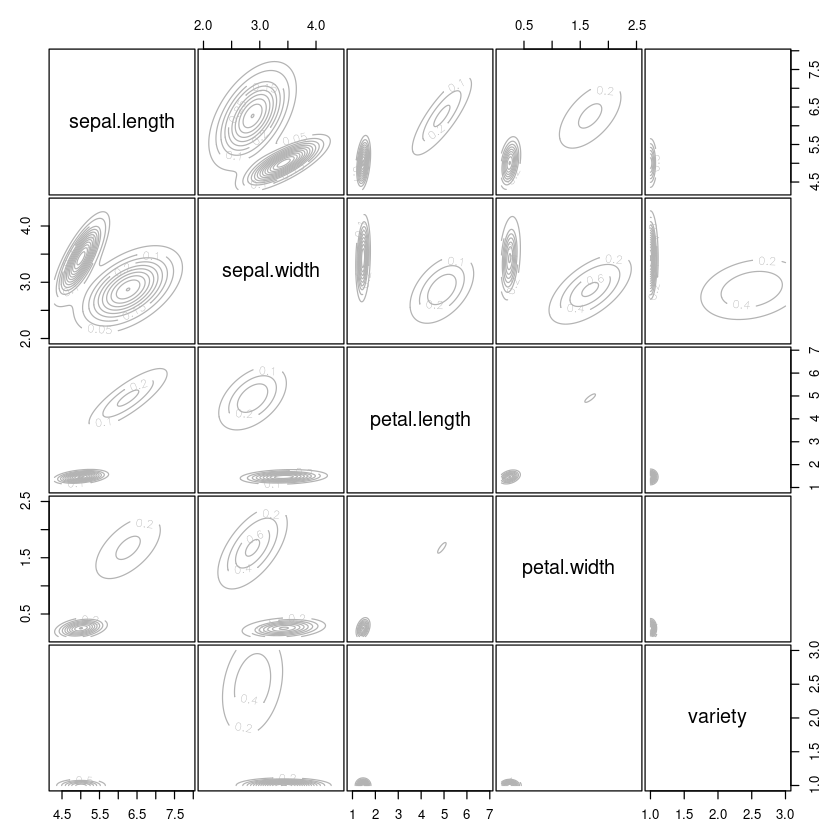

In [11]:
clus <-Mclust(datos2,2)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

In [12]:
library(cluster)
iris <- read.csv("iris.csv",sep=";",header=TRUE,dec=",")
iris2 <- subset( iris, select = -variety )
res3 <- hclust(dist(iris2))
biplot(res, xlabs= cutree(res3,3))

ERROR: Error in dimnames(x) <- list(xlabs, dimnames(x)[[2L]]): la longitud de 'dimnames' [1] no es igual a la extensión del arreglo


### b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a). Discuta sus resultados.

### purity:  $$\frac{1}{N} \displaystyle\sum_{m\in M} max_{d \in D} |{m \cap d}|$$

* M = clusters
* D = classes
* N = data points

### rand index: $$ RI = \frac{TP+TN}{TP+FP+TN+FN}$$

* TP = true positives
* FP = false postives
* TN = true negatives
* FN = false negatives

### mutual information:  $$ NMI(U,V) = \frac{2*I (U;V)}{(H (U) + H (V))} $$ 

$$ I(U;V) = H(U) - H(U|V)$$
* U = class labels
* V = cluster labels
* I(U,V) = mutual information b/w U and V
* H () = entropy

In [26]:
library(fossil)
#KMEANS
true_kmeans <- as.numeric(iris$variety)
my_kmeans <- kmeans(x = iris[,-5], centers = 3)
rand.index(true_kmeans, my_kmeans$cluster)

[1] 0.8797315

In [28]:
#MLCUST
true_mclust <- as.numeric(iris$variety)
my_mclust <- Mclust(iris,2)
rand.index(true_mclust, my_kmeans$cluster)

[1] 0.8797315

* K-MEANS:  0.879731543624161

* MCLUST: 0.879731543624161

* HCLUST: